<h1>CombustionEfficiency00_ex01</h1>
<p>compatability with OpenModelica v1.17</p>
<h2>memo: </h2>
<p></p>

<h1>Load modules </h1>

In [63]:
#****************************************
#    User must NOT edit code below 
#****************************************
import OMPython
from OMPython import OMCSessionZMQ
from OMPython import ModelicaSystem

import os
from os.path import expanduser

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import pathlib

from IPython.display import display, HTML
print('------------------------------')

------------------------------


In [64]:
#****************************************
#    User must NOT edit code below 
#****************************************
# ----- prepare for post process -----
n_df=500
df=[[]]*n_df
i_df= -1
print('----------')

----------


<h1>===========================================================================</h1>

<h1>Run simulation model #1</h1>

<h1>User settings: Library and Model information</h1>
<p>Edit the strings below </p>

In [65]:
dirWorkRelToHome='/OMPythonWork'

#dirModelRelToLibDir='/Examples/ThermodynamicCycles'
libs2load=["PropulsionSystem", "FluidSystemComponents", "WalkingInWorldOfThermoFluid", "AircraftDynamics", "SystemModels", "InteractiveSimulation"]
fullpathModel='PropulsionSystem.Examples.Subelements.CombustionEfficiency00_ex01'
nmModel='CombustionEfficiency00_ex01'
stopTime=50.0
outputFormat='csv'
print('------------------------------')

------------------------------


<h1>Setup </h1>

In [66]:
#**************************************************
# ----- setup -----
#**************************************************
#****************************************
#    User must NOT edit code below 
#****************************************
#*** get directory of this notebook
sys.path.append('..')
pathNotebook= os.getcwd()
print('------------------------------'); print('')

#*** distinguish OS
if(os.name=='nt'):
    dirHome=expanduser("~")
    typeOS='Windows (nt)'
elif(os.name=='posix'):
    dirHome=os.environ['HOME']
    typeOS= 'Linux or Mac (posix)'
##### end if #####

#*** direcotory of temporary work
dirWork= dirHome + dirWorkRelToHome

#*** get library directory
dirLib=''
sys.path.append('..')
dirLib= pathlib.Path('../../')
dirLib_upper1= pathlib.Path('../../')

dirLib= dirLib.resolve()
dirLib= str(dirLib)
dirLib= dirLib.replace('\\', '/')

dirLib_upper1= dirLib_upper1.resolve()

fullpathModelFile= str(dirLib_upper1)+'\\'+fullpathModel.replace('.','\\') +'.mo'
fullpathModelFile= fullpathModelFile.replace('\\', '/')


print("########## check user settings and related info. ##########")
print('-. This OS is: ' + typeOS)
print('-. Home directory of current environment is: ' + dirHome)
print("-. Temporary Working directory is: "+str(dirWork))
print('')
print('-. Directory of This notebook: '+ pathNotebook)
print('-. Directory of library which contains this notebook is: ' + str(dirLib))
print("-. Full path of Model to be ran is: " + fullpathModel)
print("-. Full path of Model file to be ran is: " + fullpathModelFile)

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')

------------------------------

########## check user settings and related info. ##########
-. This OS is: Linux or Mac (posix)
-. Home directory of current environment is: /home/ubuntu
-. Temporary Working directory is: /home/ubuntu/OMPythonWork

-. Directory of This notebook: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/PropulsionSystemLib
-. Directory of library which contains this notebook is: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib
-. Full path of Model to be ran is: PropulsionSystem.Examples.Subelements.CombustionEfficiency00_ex01
-. Full path of Model file to be ran is: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/PropulsionSystem/Examples/Subelements/CombustionEfficiency00_ex01.mo

------------------------------
move to directory of notebook
currend dir, back to: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/PropulsionSystemLib
------------------------------


In [67]:
#**************************************************
# ----- setup -----
#**************************************************
#****************************************
#    User must NOT edit code below 
#****************************************
omc= OMCSessionZMQ()

#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

#-- move OMShell to working directory
strcmd= 'cd("' + dirWork + '")'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))

#--------------------
#    set build option for old frontend
#    this option setting is neccesarry so that model written with older than Modelica 4.0.0 is ran by OpenModelica newer than 1.17.0
#--------------------
print(''); print('...front end setting, wait...')
strcmd='disableNewInstantiation()'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))

# --- get error message from OMShell ---
print('')
errMsg= omc.sendExpression('getErrorString()')
print('OMShell error message: ')
print(str(errMsg))
print('')

#----------------------------------------
#    settings of command line options
#----------------------------------------
print(''); print('...front end setting, wait...')
strcmd='setCommandLineOptions("--matchingAlgorithm=PFPlusExt --indexReductionMethod=dummyDerivatives -d=initialization,evaluateAllParameters,NLSanalyticJacobian")'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))

# --- get error message from OMShell ---
print('')
errMsg= omc.sendExpression('getErrorString()')
print('OMShell error message: ')
print(str(errMsg))
print('')

#----------------------------------------
#-- load Modelica Standard Library
#----------------------------------------
msgOMShell=omc.sendExpression("loadModel(Modelica)")
print("OMShell: "+ str(msgOMShell)); print('')

print('...loading custom libraries, wait...')
for i in range(len(libs2load)):
    #-- load PropulsionSystem library
    print('i='+str(i))
    strcmd='loadFile("' + str(dirLib) +'/'+ libs2load[i] +'/package.mo' + '")'
    print('send: '+strcmd)
    msgOMShell=omc.sendExpression(strcmd)
    print("OMShell: "+ str(msgOMShell))
##### end for #####
print('...load of custom libraries is completed')

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')

currend dir: /home/ubuntu/OMPythonWork
------------------------------

send: cd("/home/ubuntu/OMPythonWork")
OMShell: /home/ubuntu/OMPythonWork

...front end setting, wait...
send: disableNewInstantiation()
OMShell: True

OMShell error message: 



...front end setting, wait...
send: setCommandLineOptions("--matchingAlgorithm=PFPlusExt --indexReductionMethod=dummyDerivatives -d=initialization,evaluateAllParameters,NLSanalyticJacobian")
OMShell: True

OMShell error message: 


OMShell: True

...loading custom libraries, wait...
i=0
send: loadFile("/home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/PropulsionSystem/package.mo")
OMShell: True
i=1
send: loadFile("/home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/FluidSystemComponents/package.mo")
OMShell: True
i=2
send: loadFile("/home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/WalkingInWorldOfThermoFluid/package.mo")
OMShell: True
i=3
send: loadFile("/home/ubuntu/Dropbox/01-sharedspace/modelica-shared/C

<h1>Building Model</h1>

In [68]:
#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

#-- move OMShell to working directory
print(''); print('...moving OMshell to temporary working directry')
strcmd= 'cd("' + dirWork + '")'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))

#----------------------------------------
#    build the model
#----------------------------------------
print(''); print('...building the model, wait...')
strcmd= 'buildModel(' + fullpathModel + ', stopTime='+str(stopTime) + ', outputFormat="csv"'  + ')'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))
print('...model build finished.')
# --- get error message from OMShell ---
print('')
errMsg= omc.sendExpression('getErrorString()')
print('OMShell error message: ')
print(str(errMsg))
print('')


#-- save original parameter setting file
print(''); print('...Saving original parameter setting file...')
strcmd= 'system("'+ 'cp '+ (fullpathModel+'_init.xml') +' '+ (fullpathModel+'_init_org.xml') +'")'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')

currend dir: /home/ubuntu/OMPythonWork
------------------------------


...moving OMshell to temporary working directry
send: cd("/home/ubuntu/OMPythonWork")
OMShell: /home/ubuntu/OMPythonWork

...building the model, wait...
send: buildModel(PropulsionSystem.Examples.Subelements.CombustionEfficiency00_ex01, stopTime=50.0, outputFormat="csv")
OMShell: ('/home/ubuntu/OMPythonWork/PropulsionSystem.Examples.Subelements.CombustionEfficiency00_ex01', 'PropulsionSystem.Examples.Subelements.CombustionEfficiency00_ex01_init.xml')
...model build finished.

OMShell error message: 
Notification: PropulsionSystem requested package Modelica of version 3.2.2. Modelica 3.2.3 is used instead which states that it is fully compatible without conversion script needed.
Notification: AircraftDynamics requested package Modelica of version 3.2.2. Modelica 3.2.3 is used instead which states that it is fully compatible without conversion script needed.



...Saving original parameter setting file...
send: syste

<h1>Print source code of model built</h1>

In [69]:
#****************************************
#    User must NOT edit code below 
#****************************************
#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

strcmd= 'list('+fullpathModel+')'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print('source code of model build:')
print('')
print(str(msgOMShell)); 

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')

currend dir: /home/ubuntu/OMPythonWork
------------------------------

send: list(PropulsionSystem.Examples.Subelements.CombustionEfficiency00_ex01)
source code of model build:

model CombustionEfficiency00_ex01
  extends Modelica.Icons.Example;
  PropulsionSystem.Subelements.CombustionEfficiency00 calcEffComb(switchFuel = PropulsionSystem.Types.switches.switch_fuel.gasoline) annotation(
    Placement(visible = true, transformation(origin = {0, 30}, extent = {{-10, -10}, {10, 10}}, rotation = 0)));
  Modelica.Blocks.Sources.Ramp ramp_fracFuel(duration = 10, height = 0.18, offset = 0.02, startTime = 10) annotation(
    Placement(visible = true, transformation(origin = {-70, 10}, extent = {{-10, -10}, {10, 10}}, rotation = 0)));
  Modelica.Blocks.Math.Feedback feedback1 annotation(
    Placement(visible = true, transformation(origin = {-40, 36}, extent = {{-10, -10}, {10, 10}}, rotation = 0)));
  Modelica.Blocks.Sources.Constant const(k = 1) annotation(
    Placement(visible = true, tran

<h1>Run simulation, default setting</h1>

In [70]:
iRun=0
startTime=0
stopTime=50
stepSize=0.01
#----------
numberOfIntervals=int((stopTime-startTime)/stepSize)
print('numberOfIntervals of simulation='+str(numberOfIntervals))
print('')

#****************************************
#    User must NOT edit code below 
#****************************************
#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

#-- reset _init.xml
print('...calling original parameter setting file...')
strcmd= 'system("'+ 'cp '+ (fullpathModel+'_init_org.xml') +' '+ (fullpathModel+'_init.xml') +'")'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell)); print('')

#-- run simulation with default parameter setting
print("...running simulation, wait...")
if(os.name=='nt'):
    strcmd= 'system("' + fullpathModel + '.exe'  + ' -override=startTime='+str(startTime)+',stopTime='+str(stopTime)+',stepSize='+str(stepSize)  + ' -r=' + fullpathModel + '_res.csv' +'")'
elif(os.name=='posix'):
    strcmd= 'system("' + './'+fullpathModel  + ' -override=startTime='+str(startTime)+',stopTime='+str(stopTime)+',stepSize='+str(stepSize)  + ' -r=' + fullpathModel + '_res.csv'  +'")'
##### end if #####
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))

# --- get error message from OMShell ---
print('')
errMsg= omc.sendExpression('getErrorString()')
print('OMShell error message: ')
print(str(errMsg))
print('')

print('...simulation run finished.')

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')

numberOfIntervals of simulation=5000

currend dir: /home/ubuntu/OMPythonWork
------------------------------

...calling original parameter setting file...
send: system("cp PropulsionSystem.Examples.Subelements.CombustionEfficiency00_ex01_init_org.xml PropulsionSystem.Examples.Subelements.CombustionEfficiency00_ex01_init.xml")
OMShell: 0

...running simulation, wait...
send: system("./PropulsionSystem.Examples.Subelements.CombustionEfficiency00_ex01 -override=startTime=0,stopTime=50,stepSize=0.01 -r=PropulsionSystem.Examples.Subelements.CombustionEfficiency00_ex01_res.csv")
OMShell: 0

OMShell error message: 


...simulation run finished.

------------------------------
move to directory of notebook
currend dir, back to: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/PropulsionSystemLib
------------------------------


<h1>Run simulation</h1>
<h2>parameter sweep, 1 parameter </h2>

In [71]:
#****************************************
#    User Setting section 
#****************************************
iRunBegin=2
iRunEnd=3
param2change="ramp_fracFuel.height"
valBegin=0.02
deltaVal=0.01

startTime=0
stopTime=50
stepSize=0.01

#----------
numberOfIntervals=int((stopTime-startTime)/stepSize)
print('numberOfIntervals of simulation='+str(numberOfIntervals))
print('')

#****************************************
#    User must NOT edit code below 
#****************************************
#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

for i in range(iRunBegin, iRunEnd+1):
    iRun=i
    value2set=valBegin+(i-1)*deltaVal
    filenameXmlOrg=fullpathModel+'_init_org.xml'
    filenameXmlNew=fullpathModel+'_init_'+str(iRun)+'.xml'
    
    print(''); print('-----')
    print('iRun= '+ str(iRun))
    
    #-- overwrite parameter setting xml file
    print('...Overwriting parameter setting file...')
    strcmd= 'setInitXmlStartValue("' + filenameXmlOrg+'", '+ '"'+param2change+'", ' + '"'+str(value2set)+'", '+ '"'+fullpathModel+'_init.xml"' +')'
    print('send: '+strcmd)
    msgOMShell=omc.sendExpression(strcmd)
    print("OMShell: "+ str(msgOMShell))

    #-- save parameter setting file after overwriting
    print(''); print('...Saving parameter setting file...')
    strcmd= 'system("'+ 'cp '+ (fullpathModel+'_init.xml') +' '+ (filenameXmlNew) +'")'
    print('send: '+strcmd)
    msgOMShell=omc.sendExpression(strcmd)
    print("OMShell: "+ str(msgOMShell))

    #-- run simulation with default parameter setting
    print(''); print("...running simulation, wait...")
    if(os.name=='nt'):
        strcmd= 'system("' + fullpathModel + '.exe'  + ' -override=startTime='+str(startTime)+',stopTime='+str(stopTime)+',stepSize='+str(stepSize)  + ' -r=' + fullpathModel + '_res_'+ str(iRun) +'.csv' +'")'
    elif(os.name=='posix'):
        strcmd= 'system("' + './'+fullpathModel  + ' -override=startTime='+str(startTime)+',stopTime='+str(stopTime)+',stepSize='+str(stepSize)  + ' -r=' + fullpathModel + '_res_'+ str(iRun) +'.csv'  +'")'
    ##### end if #####
    
    print('send: '+strcmd)
    msgOMShell=omc.sendExpression(strcmd)
    print("OMShell: "+ str(msgOMShell))
    print('...simulation run finished.')
##### end for #####

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')

numberOfIntervals of simulation=5000

currend dir: /home/ubuntu/OMPythonWork
------------------------------


-----
iRun= 2
...Overwriting parameter setting file...
send: setInitXmlStartValue("PropulsionSystem.Examples.Subelements.CombustionEfficiency00_ex01_init_org.xml", "ramp_fracFuel.height", "0.03", "PropulsionSystem.Examples.Subelements.CombustionEfficiency00_ex01_init.xml")
OMShell: True

...Saving parameter setting file...
send: system("cp PropulsionSystem.Examples.Subelements.CombustionEfficiency00_ex01_init.xml PropulsionSystem.Examples.Subelements.CombustionEfficiency00_ex01_init_2.xml")
OMShell: 0

...running simulation, wait...
send: system("./PropulsionSystem.Examples.Subelements.CombustionEfficiency00_ex01 -override=startTime=0,stopTime=50,stepSize=0.01 -r=PropulsionSystem.Examples.Subelements.CombustionEfficiency00_ex01_res_2.csv")
OMShell: 0
...simulation run finished.

-----
iRun= 3
...Overwriting parameter setting file...
send: setInitXmlStartValue("PropulsionSystem.

<h1>Run simulation</h1>
<h2>Change multiple parameters </h2>

In [72]:
#****************************************
#    User Setting section 
#****************************************
iRun=1
param2change=[
    'ramp_fracFuel.height',
    'ramp_fracFuel.offset',
]
value2set=[
    0.02,
    0.18,
]

startTime=0
stopTime=50
stepSize=0.01

#----------
numberOfIntervals=int((stopTime-startTime)/stepSize)
print('numberOfIntervals of simulation='+str(numberOfIntervals))
print('')


#****************************************
#    User must NOT edit code below 
#****************************************
#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

filenameXmlNew=fullpathModel+'_init_'+str(iRun)+'.xml'
#-- reset _init.xml
print('iRun='+str(iRun))
print('...Saving parameter setting file...')
strcmd= 'system("'+ 'cp '+ (fullpathModel+'_init_org.xml') +' '+ (fullpathModel+'_init.xml') +'")'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell)); print('')

print('...editing parameter setting file, wait...')
for i in range(len(param2change)):
    #----------
    #-- overwrite parameter setting xml file
    #- index 0
    print('i='+str(i))
    strcmd= 'setInitXmlStartValue("' +(fullpathModel+'_init.xml')+'", '+ '"'+param2change[i]+'", ' + '"'+str(value2set[i])+'", '+ '"'+(fullpathModel+'_init.xml')+'")'
    print('send: '+strcmd)
    msgOMShell=omc.sendExpression(strcmd)
    print("OMShell: "+ str(msgOMShell))
##### end for #####
print('...edit of parameter setting file is completed.')

#----------
#-- save parameter setting file after overwriting
print(''); print('...Saving parameter setting file...')
strcmd= 'system("'+ 'cp '+ (fullpathModel+'_init.xml') +' '+ (filenameXmlNew) +'")'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))

#-- run simulation
print(''); print("...running simulation, wait...")
if(os.name=='nt'):
    strcmd= 'system("' + fullpathModel + '.exe'  + ' -override=startTime='+str(startTime)+',stopTime='+str(stopTime)+',stepSize='+str(stepSize)  + ' -r=' + fullpathModel + '_res_'+ str(iRun) +'.csv' +'")'
elif(os.name=='posix'):
    strcmd= 'system("' + './'+fullpathModel  + ' -override=startTime='+str(startTime)+',stopTime='+str(stopTime)+',stepSize='+str(stepSize)  + ' -r=' + fullpathModel + '_res_'+ str(iRun) +'.csv'  +'")'
##### end if #####

print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))
print('...simulation run finished.')

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')

numberOfIntervals of simulation=5000

currend dir: /home/ubuntu/OMPythonWork
------------------------------

iRun=1
...Saving parameter setting file...
send: system("cp PropulsionSystem.Examples.Subelements.CombustionEfficiency00_ex01_init_org.xml PropulsionSystem.Examples.Subelements.CombustionEfficiency00_ex01_init.xml")
OMShell: 0

...editing parameter setting file, wait...
i=0
send: setInitXmlStartValue("PropulsionSystem.Examples.Subelements.CombustionEfficiency00_ex01_init.xml", "ramp_fracFuel.height", "0.02", "PropulsionSystem.Examples.Subelements.CombustionEfficiency00_ex01_init.xml")
OMShell: True
i=1
send: setInitXmlStartValue("PropulsionSystem.Examples.Subelements.CombustionEfficiency00_ex01_init.xml", "ramp_fracFuel.offset", "0.18", "PropulsionSystem.Examples.Subelements.CombustionEfficiency00_ex01_init.xml")
OMShell: True
...edit of parameter setting file is completed.

...Saving parameter setting file...
send: system("cp PropulsionSystem.Examples.Subelements.CombustionEffi

<h1>---------------------------------------------------------------------------------------------------------</h1>

<h1>Post Process --- Read csv data into table object ---</h1>

<h2>Read csv, case of default parameter setting</h2>

In [73]:
i_df=0

#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

nmcsv= fullpathModel + '_res.csv'
print("data read: "+ os.getcwd()+"/"+nmcsv)
df.insert(i_df, pd.read_csv(nmcsv))

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())

df[i_df]

currend dir: /home/ubuntu/OMPythonWork
------------------------------

data read: /home/ubuntu/OMPythonWork/PropulsionSystem.Examples.Subelements.CombustionEfficiency00_ex01_res.csv

------------------------------
move to directory of notebook
currend dir, back to: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/PropulsionSystemLib


,time,calcEffComb.FAR,calcEffComb.u_fracAir,calcEffComb.u_fracFuel,calcEffComb.y_AFR,calcEffComb.y_effComb,calcEffComb.y_lambda,const.y,calcEffComb.flagValid,calcEffComb.AFR,calcEffComb.effComb,calcEffComb.lambda,feedback1.u1,feedback1.u2,feedback1.y,ramp_fracFuel.y
0,0.00,0.020408,0.98,0.02,49.0,0.985456,3.333333,1,0,49.0,0.985456,3.333333,1,0.02,0.98,0.02
1,0.01,0.020408,0.98,0.02,49.0,0.985456,3.333333,1,0,49.0,0.985456,3.333333,1,0.02,0.98,0.02
2,0.02,0.020408,0.98,0.02,49.0,0.985456,3.333333,1,0,49.0,0.985456,3.333333,1,0.02,0.98,0.02
3,0.03,0.020408,0.98,0.02,49.0,0.985456,3.333333,1,0,49.0,0.985456,3.333333,1,0.02,0.98,0.02
4,0.04,0.020408,0.98,0.02,49.0,0.985456,3.333333,1,0,49.0,0.985456,3.333333,1,0.02,0.98,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001,49.97,0.250000,0.80,0.20,4.0,0.000000,0.272109,1,0,4.0,0.000000,0.272109,1,0.20,0.80,0.20
5002,49.98,0.250000,0.80,0.20,4.0,0.000000,0.272109,1,0,4.0,0.000000,0.272109,1,0.20,0.80,0.20
5003,49.99,0.250000,0.80,0.20,4.0,0.000000,0.272109,1,0,4.0,0.000000,0.272109,1,0.20,0.80,0.20
5004,50.00,0.250000,0.80,0.20,4.0,0.000000,0.272109,1,0,4.0,0.000000,0.272109,1,0.20,0.80,0.20


<h1> list of columns on csv </h1>

In [74]:
i_df=0

print('list of variables on csv')
df[i_df].columns.tolist()


list of variables on csv


['time',
 'calcEffComb.FAR',
 'calcEffComb.u_fracAir',
 'calcEffComb.u_fracFuel',
 'calcEffComb.y_AFR',
 'calcEffComb.y_effComb',
 'calcEffComb.y_lambda',
 'const.y',
 'calcEffComb.flagValid',
 'calcEffComb.AFR',
 'calcEffComb.effComb',
 'calcEffComb.lambda',
 'feedback1.u1',
 'feedback1.u2',
 'feedback1.y',
 'ramp_fracFuel.y']

<h1>Read csv, array, specify start and end</h1>

In [75]:
i_df_begin=2
i_df_end=3


#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

for i in range(i_df_begin, i_df_end+1):
    i_df=i
    print('i_df='+str(i_df))
    nmcsv= fullpathModel + '_res_'+str(i_df)+'.csv'
    print("data read: "+ os.getcwd()+"/"+nmcsv)
    df.insert(i_df, pd.read_csv(nmcsv))
##### end for #####
    
#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())


currend dir: /home/ubuntu/OMPythonWork
------------------------------

i_df=2
data read: /home/ubuntu/OMPythonWork/PropulsionSystem.Examples.Subelements.CombustionEfficiency00_ex01_res_2.csv
i_df=3
data read: /home/ubuntu/OMPythonWork/PropulsionSystem.Examples.Subelements.CombustionEfficiency00_ex01_res_3.csv

------------------------------
move to directory of notebook
currend dir, back to: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/PropulsionSystemLib


<h1>Read csv, selected case#</h1>

In [76]:
i_df=1

#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

nmcsv= fullpathModel + '_res_'+str(i_df)+'.csv'
print("data read: "+ os.getcwd()+"/"+nmcsv)
df.insert(i_df, pd.read_csv(nmcsv))

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())

df[i_df]

currend dir: /home/ubuntu/OMPythonWork
------------------------------

data read: /home/ubuntu/OMPythonWork/PropulsionSystem.Examples.Subelements.CombustionEfficiency00_ex01_res_1.csv

------------------------------
move to directory of notebook
currend dir, back to: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/PropulsionSystemLib


,time,calcEffComb.FAR,calcEffComb.u_fracAir,calcEffComb.u_fracFuel,calcEffComb.y_AFR,calcEffComb.y_effComb,calcEffComb.y_lambda,const.y,calcEffComb.flagValid,calcEffComb.AFR,calcEffComb.effComb,calcEffComb.lambda,feedback1.u1,feedback1.u2,feedback1.y,ramp_fracFuel.y
0,0.00,0.020408,0.98,0.02,49.0,0.985456,3.333333,1,0,49.0,0.985456,3.333333,1,0.02,0.98,0.02
1,0.01,0.020408,0.98,0.02,49.0,0.985456,3.333333,1,0,49.0,0.985456,3.333333,1,0.02,0.98,0.02
2,0.02,0.020408,0.98,0.02,49.0,0.985456,3.333333,1,0,49.0,0.985456,3.333333,1,0.02,0.98,0.02
3,0.03,0.020408,0.98,0.02,49.0,0.985456,3.333333,1,0,49.0,0.985456,3.333333,1,0.02,0.98,0.02
4,0.04,0.020408,0.98,0.02,49.0,0.985456,3.333333,1,0,49.0,0.985456,3.333333,1,0.02,0.98,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001,49.97,0.250000,0.80,0.20,4.0,0.000000,0.272109,1,0,4.0,0.000000,0.272109,1,0.20,0.80,0.20
5002,49.98,0.250000,0.80,0.20,4.0,0.000000,0.272109,1,0,4.0,0.000000,0.272109,1,0.20,0.80,0.20
5003,49.99,0.250000,0.80,0.20,4.0,0.000000,0.272109,1,0,4.0,0.000000,0.272109,1,0.20,0.80,0.20
5004,50.00,0.250000,0.80,0.20,4.0,0.000000,0.272109,1,0,4.0,0.000000,0.272109,1,0.20,0.80,0.20


<h1>===========================================================================</h1>

<h1>Post Process --- Visualization ---</h1>

In [77]:
fig=[]
i_fig=-1
print('------------------------------')

------------------------------


<h2>Simulation results; Inputs</h2>

------------------------------


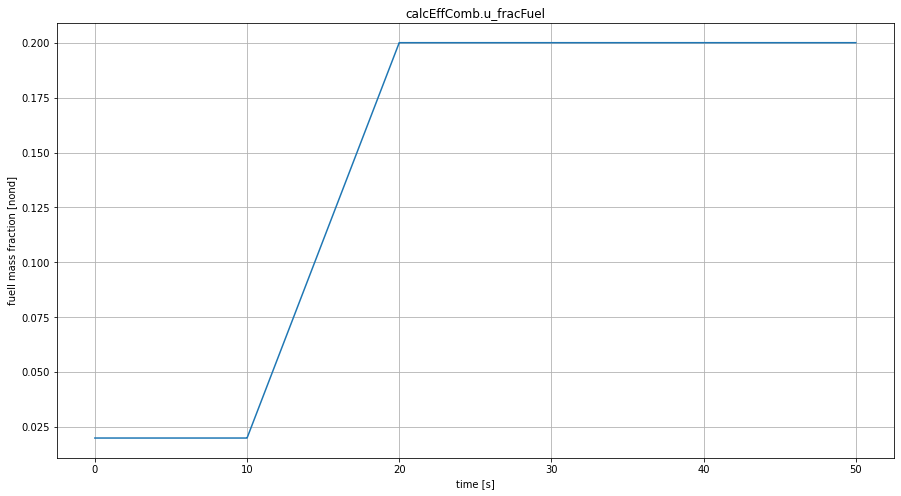

In [78]:
i_df=1
varName="calcEffComb.u_fracFuel"
ylabel='fuell mass fraction [nond]'

time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]
fig.append(plt.figure(figsize=(15,8)))
plt.xlabel('time [s]')
plt.ylabel(ylabel)
plt.plot(time, var)
plt.title(varName)
plt.grid()
print('------------------------------')

<h2>Simulation Results; Outputs</h2>

------------------------------


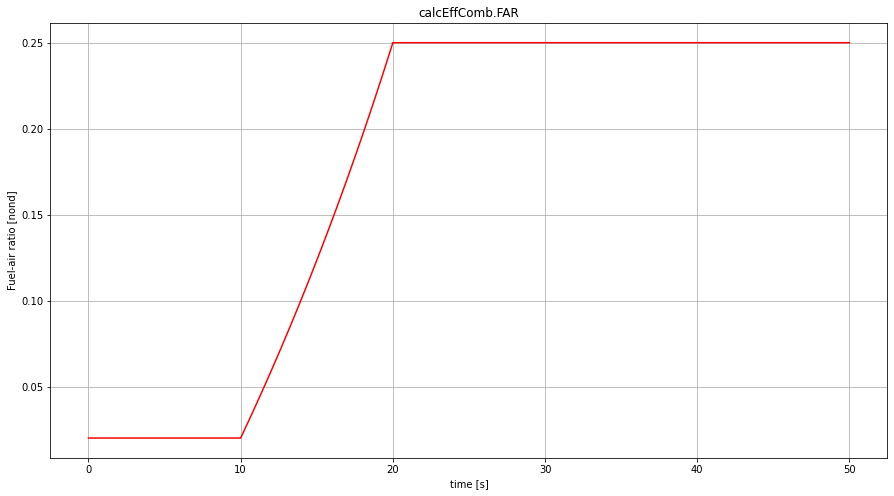

In [79]:
i_df=1
varName="calcEffComb.FAR"
ylabel='Fuel-air ratio [nond]'

time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]
fig.append(plt.figure(figsize=(15,8)))
plt.xlabel('time [s]')
plt.ylabel(ylabel)
plt.title(varName)
plt.plot(time, var, color='red')

plt.grid()
print('------------------------------')

------------------------------


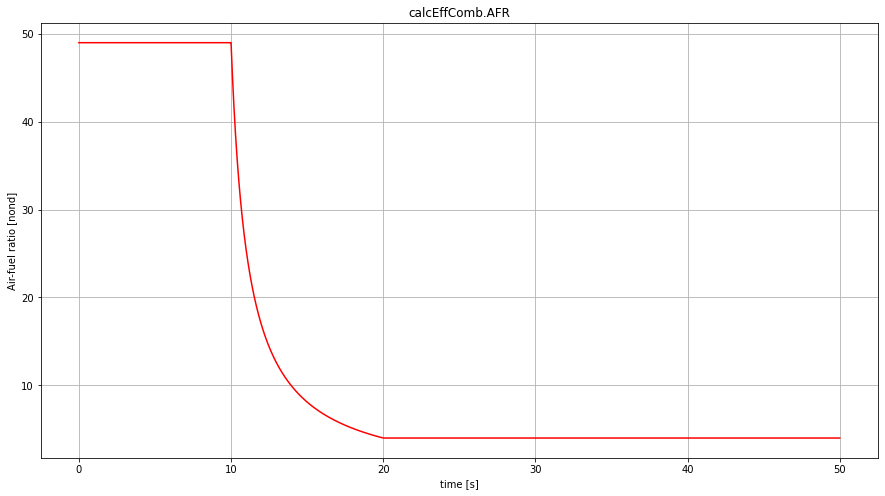

In [80]:
i_df=1
varName="calcEffComb.AFR"
ylabel='Air-fuel ratio [nond]'

time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]
fig.append(plt.figure(figsize=(15,8)))
plt.xlabel('time [s]')
plt.ylabel(ylabel)
plt.title(varName)
plt.plot(time, var, color='red')

plt.grid()
print('------------------------------')

------------------------------


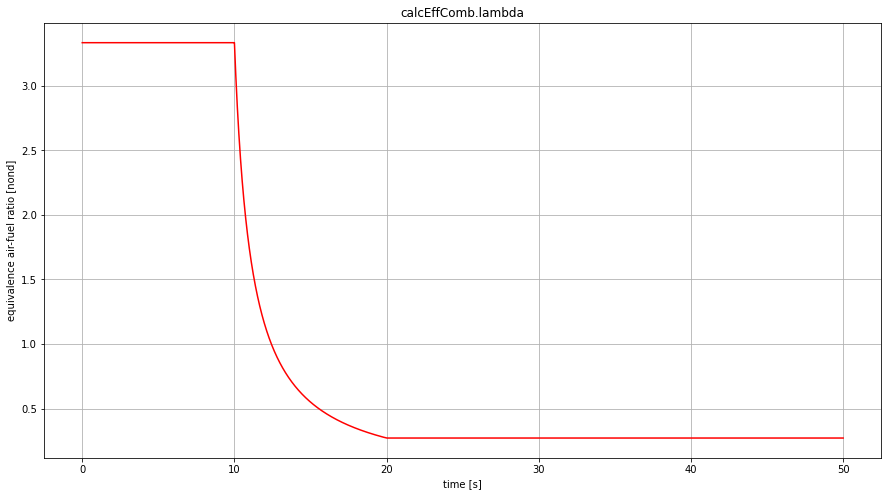

In [81]:
i_df=1
varName="calcEffComb.lambda"
ylabel='equivalence air-fuel ratio [nond]'

time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]
fig.append(plt.figure(figsize=(15,8)))
plt.xlabel('time [s]')
plt.ylabel(ylabel)
plt.title(varName)
plt.plot(time, var, color='red')

plt.grid()
print('------------------------------')

------------------------------


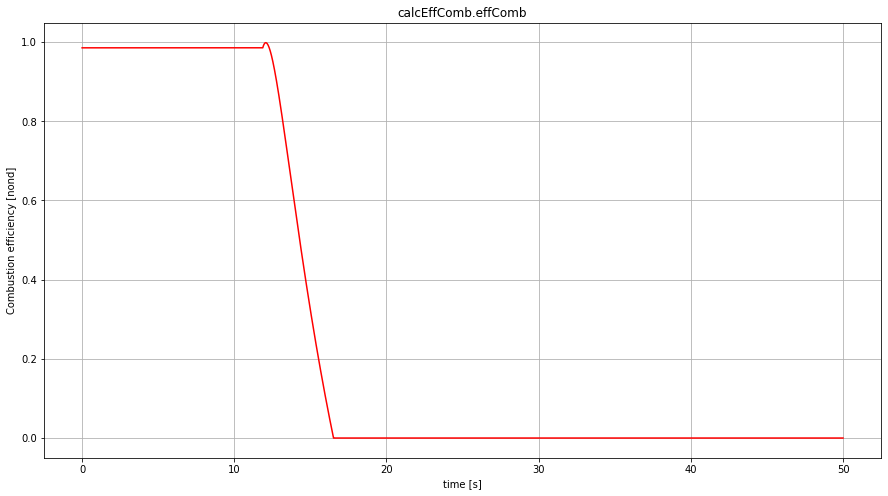

In [82]:
i_df=1
varName="calcEffComb.effComb"
ylabel='Combustion efficiency [nond]'

time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]
fig.append( plt.figure(figsize=(15,8)) )
plt.xlabel('time [s]')
plt.ylabel(ylabel)
plt.title(varName)
plt.plot(time, var, color='red')

plt.grid()
print('------------------------------')

------------------------------


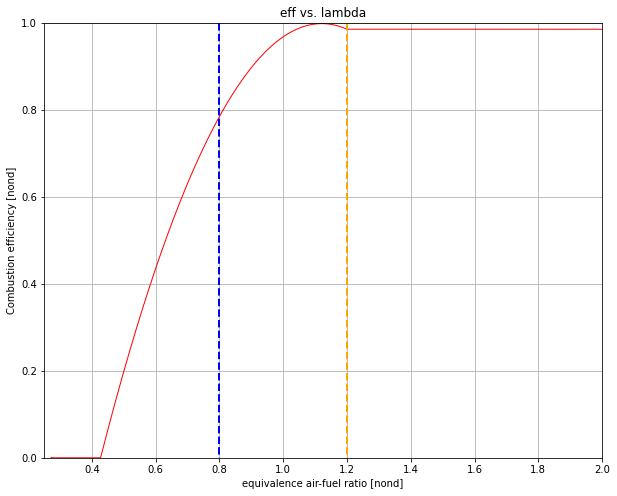

In [83]:
i_df=1
title="eff vs. lambda"
xVarName="calcEffComb.lambda"
yVarName="calcEffComb.effComb"
xlabel='equivalence air-fuel ratio [nond]'
ylabel='Combustion efficiency [nond]'

xVar= df[i_df].loc[:, xVarName]
yVar= df[i_df].loc[:, yVarName]
fig.append(plt.figure(figsize=(10,8)))
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.plot(xVar, yVar, color='red', linewidth=1.0)
plt.grid()

plt.xlim(0.25, 2.0)
plt.ylim(0.0, 1.0)

#***** additional lines *****
x_lineLlim=[0.8, 0.8]
y_lineLlim=[-1.0, 2.0]
plt.plot(x_lineLlim, y_lineLlim, linestyle="--", color='blue', linewidth=2.0)

x_lineUlim=[1.2, 1.2]
y_lineUlim=[-1.0, 2.0]
plt.plot(x_lineUlim, y_lineUlim, linestyle="--", color='orange', linewidth=2.0)
print('------------------------------')

------------------------------


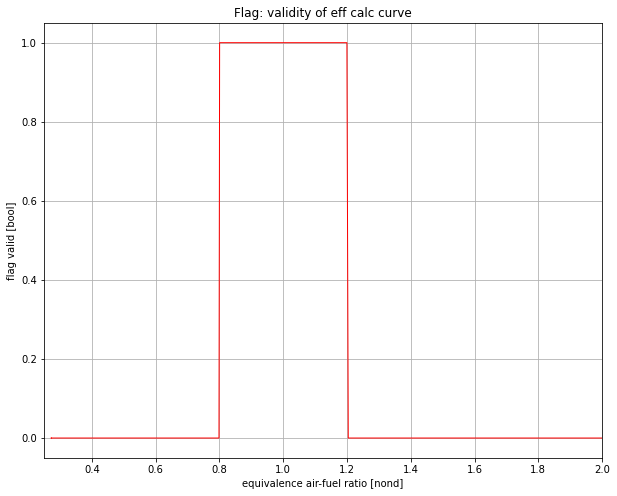

In [84]:
i_df=1
title="Flag: validity of eff calc curve"
xVarName="calcEffComb.lambda"
yVarName="calcEffComb.flagValid"
xlabel='equivalence air-fuel ratio [nond]'
ylabel='flag valid [bool]'

xVar= df[i_df].loc[:, xVarName]
yVar= df[i_df].loc[:, yVarName]
fig.append(plt.figure(figsize=(10,8)))
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.plot(xVar, yVar, color='red', linewidth=1.0)
plt.grid()

plt.xlim(0.25, 2.0)
#plt.xticks(numpy.arange(0, 40000, 5000))
#plt.yticks(numpy.arange(-10000, 40000, 5000))

print('------------------------------')

<h1>Process at the end of note</h1>

In [85]:
print(""); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')


------------------------------
move to directory of notebook
currend dir, back to: /home/ubuntu/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/PropulsionSystemLib
------------------------------
